In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier

In [157]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [158]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


0 - noncardio, 1 - cardio
0    35021
1    34979
Name: cardio, dtype: int64


C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

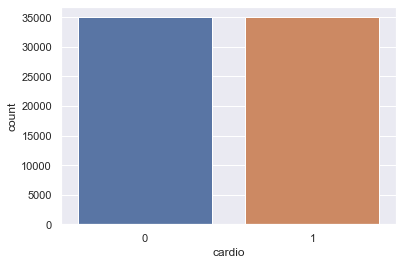

In [160]:
#Target values distribution
print("0 - noncardio, 1 - cardio")
x=(df.cardio.value_counts())
print(x)
sns.countplot(df["cardio"])

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


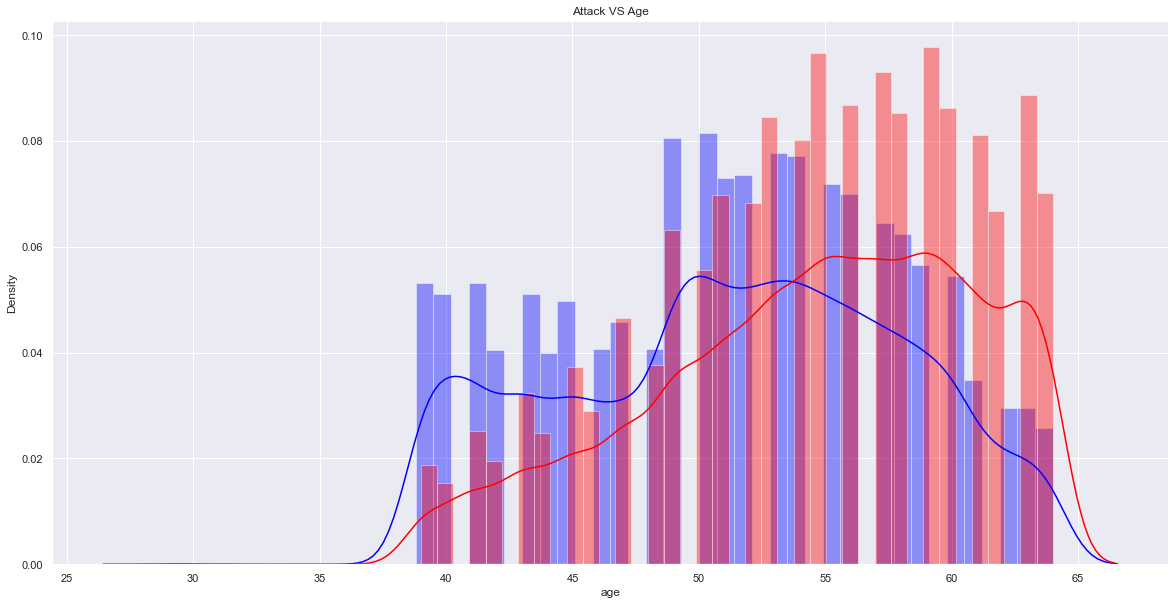

In [140]:
#Heart Attack vs Age
plt.figure(figsize=(20,10))
sns.distplot(df[df['target'] == 0]["age"], color='blue',kde=True) 
sns.distplot(df[df['target'] == 1]["age"], color='red',kde=True)
plt.title('Attack VS Age')
plt.show()

<Figure size 1440x1440 with 0 Axes>

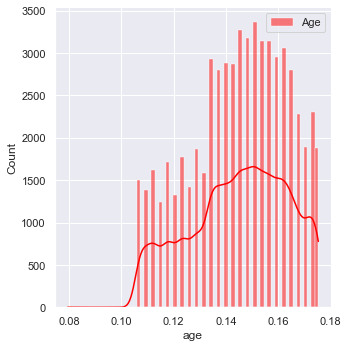

In [144]:
#Density distribution for Age¶
plt.figure(figsize=(20,20))
sns.displot(df.age/365, color="red", kde= True,label="Age")
plt.legend()

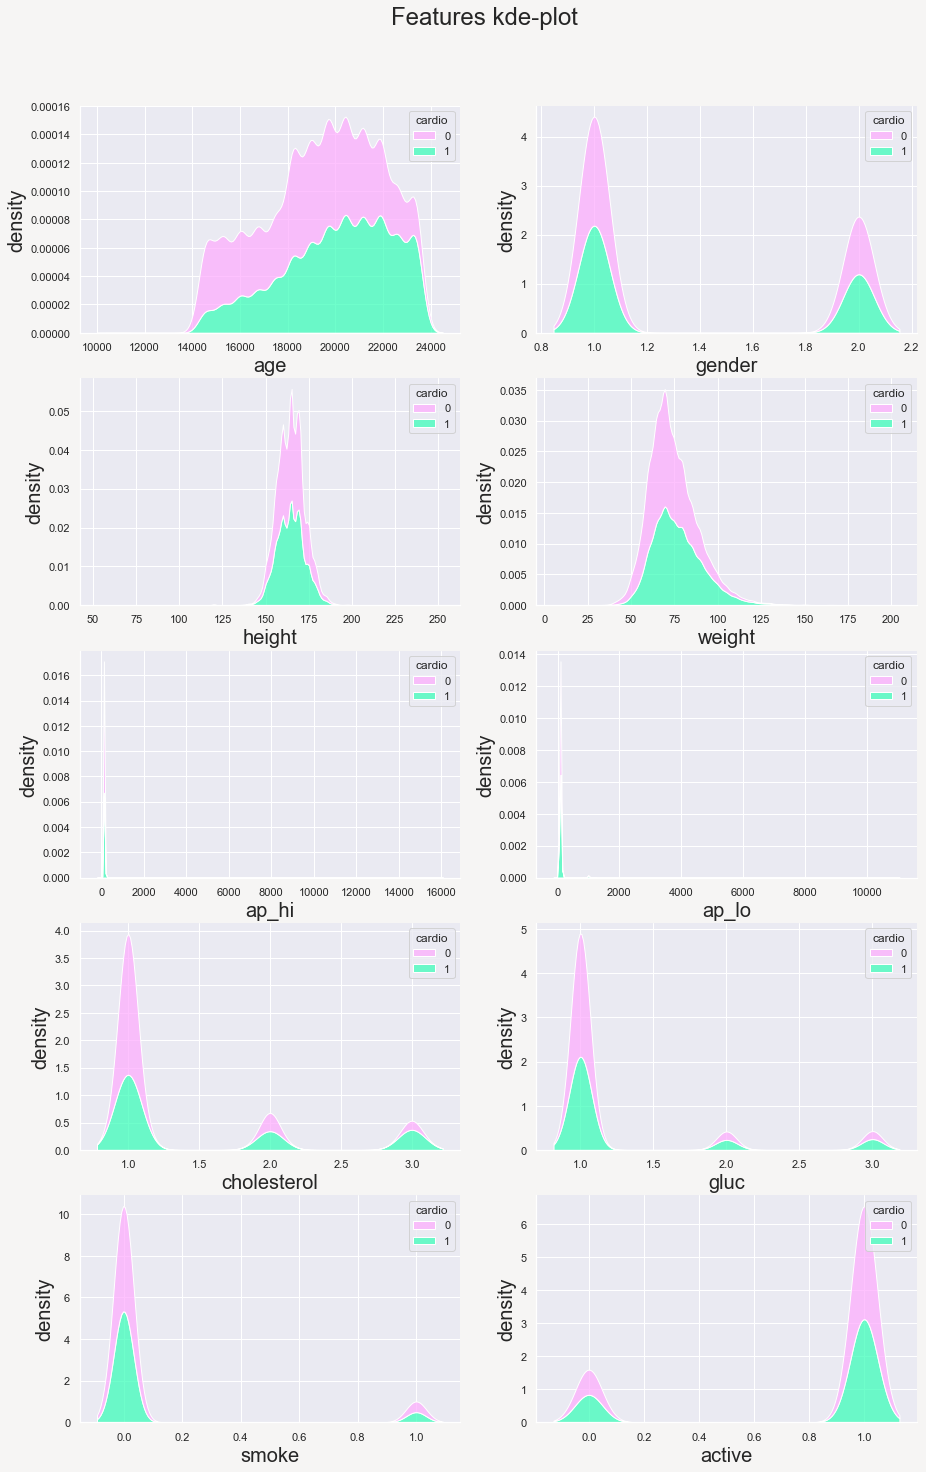

In [162]:
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','active']
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(15, 23),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i)
    
    ax = sns.kdeplot(data=df, x=col, hue="cardio", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Features kde-plot' ,fontsize = 24);

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


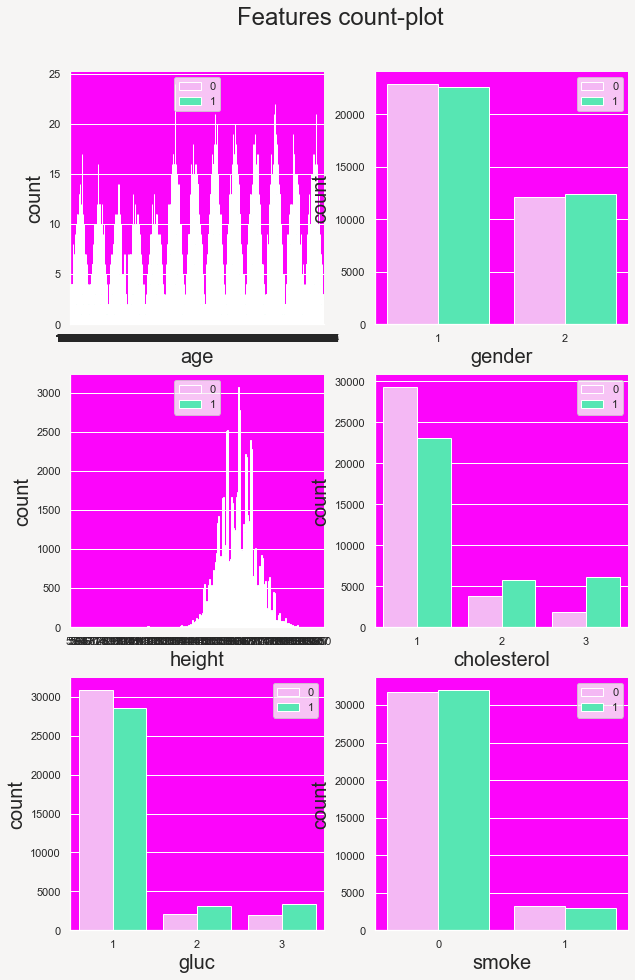

In [166]:
#Features count-plot
num = ['age', 'gender', 'height','cholesterol','gluc','smoke','active']
def hist_plot(df, num):    
    L = len(num)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(10, 15), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in num:
        plt.subplot(nrow, ncol, i, facecolor='#FC05FB')
        g = sns.countplot(data=df, x=col, hue="cardio", palette=mypal[1::4])
        g.set_xlabel(col, fontsize=20)
        g.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        i = i +1

    plt.suptitle('Features count-plot' ,fontsize = 24)
    return 0

hist_plot(df, num[0:-1]);

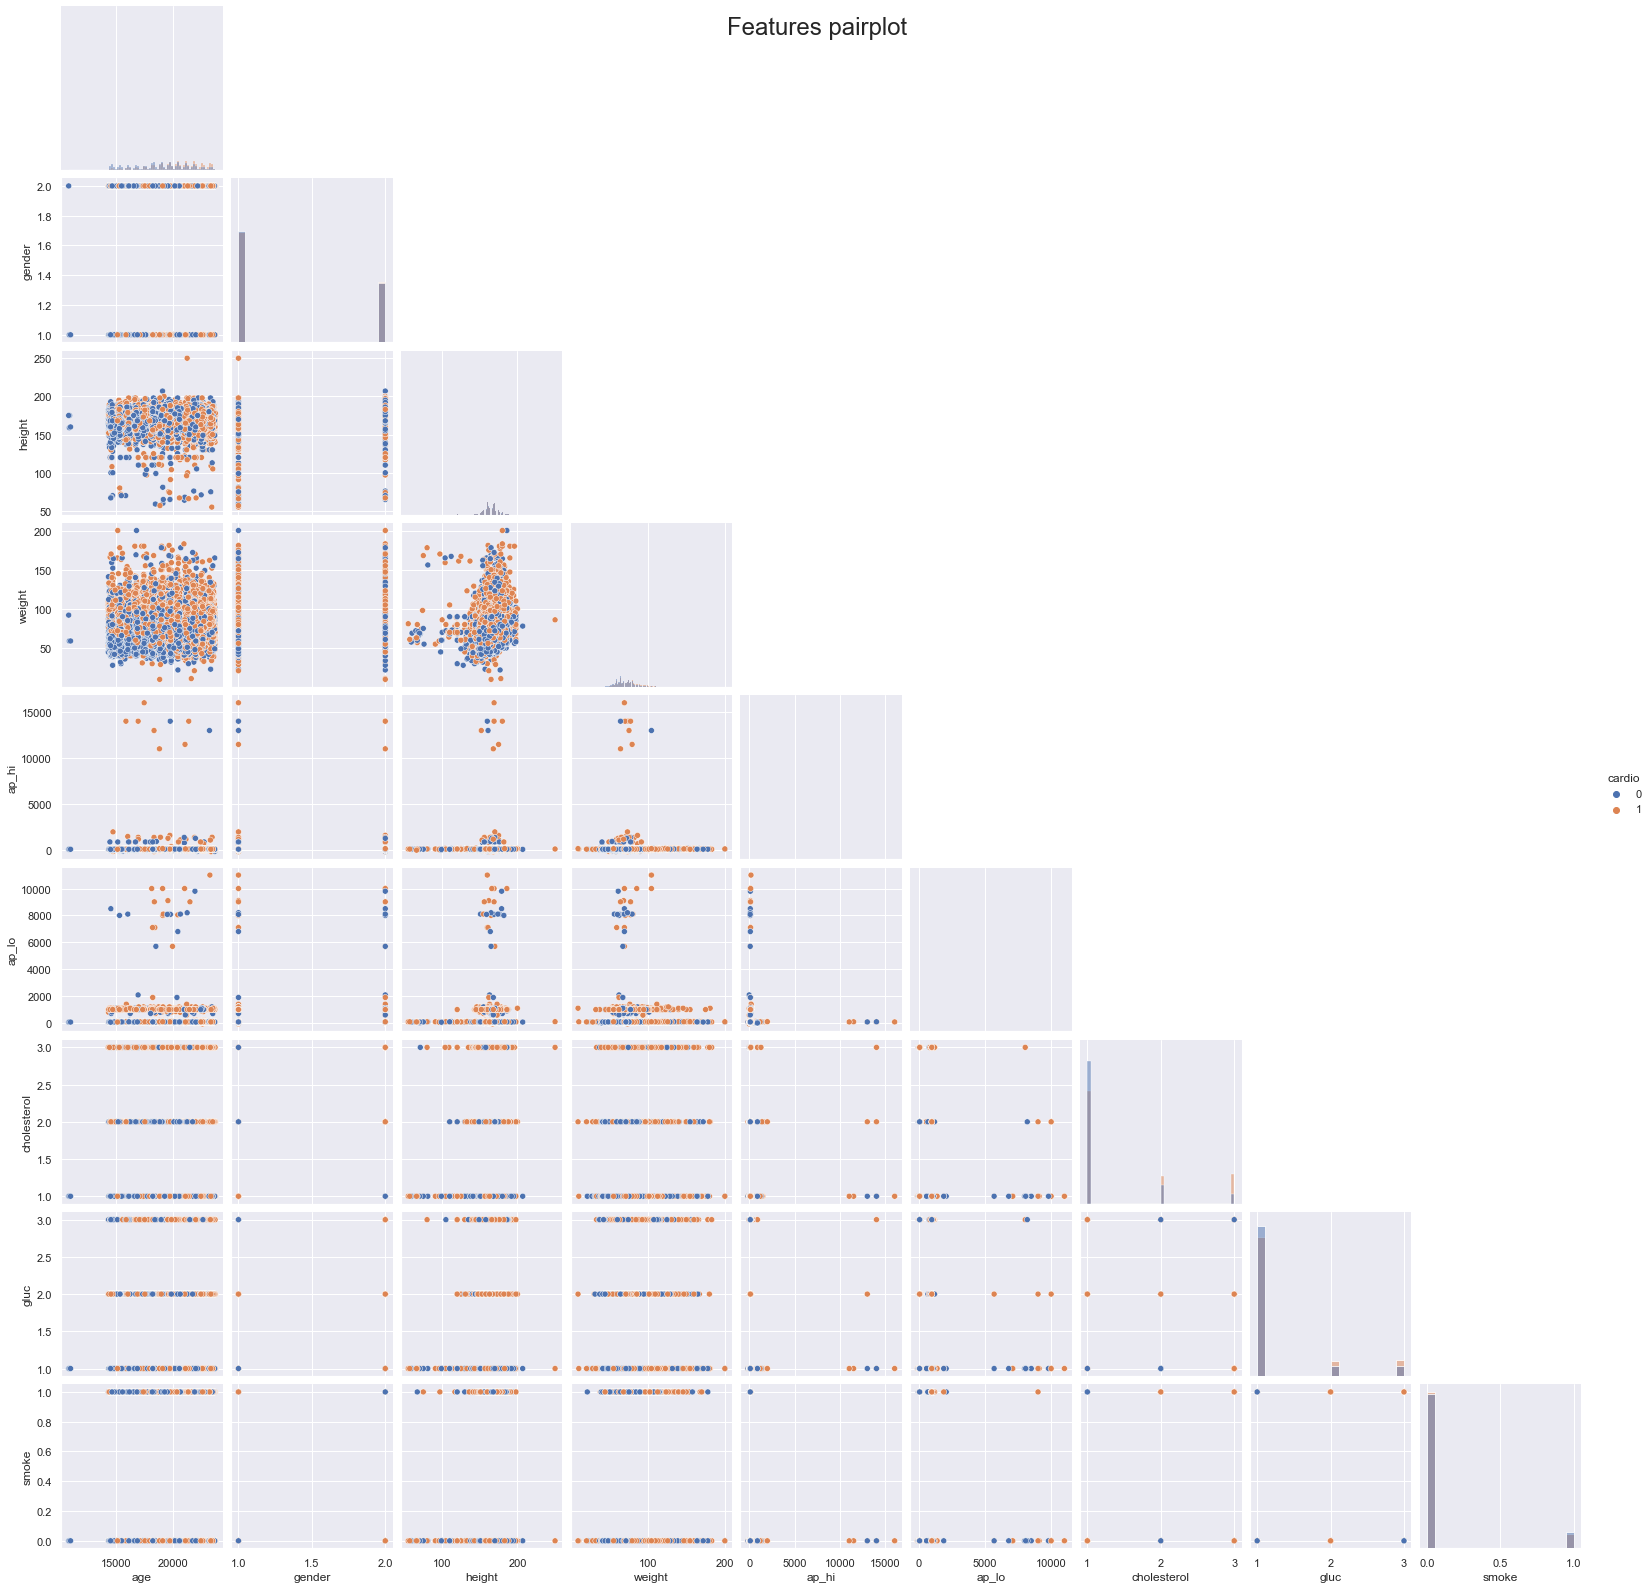

In [164]:
#Features pairplot
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','cardio']
data = df[num_feats]
g = sns.pairplot(data, hue="cardio", corner=True, diag_kind='hist')
plt.suptitle('Features pairplot' ,fontsize = 24);

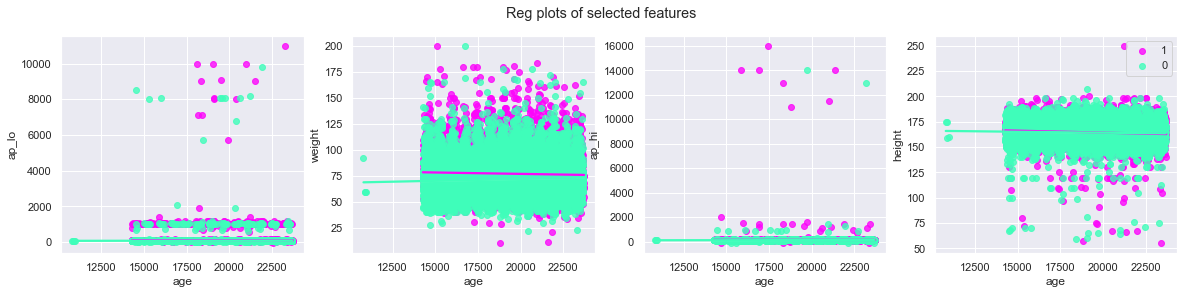

In [165]:
#Reg plot of selected features
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['cardio'] ==1], x='age', y='ap_lo', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='ap_lo', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=df[df['cardio'] ==1], x='age', y='weight', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='weight', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=df[df['cardio'] ==1], x='age', y='ap_hi', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='ap_hi', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=df[df['cardio'] ==1], x='age', y='height', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=df[df['cardio'] ==0], x='age', y='height', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();